<img src="bit_hd.jpg"/>

-------------------------------------------------------------------------------------------------------------------------------

## <span style="color:blue"> DEFINATION </span>: Predict Air Quality Index applying Multi Linear Regression  Algorithm.

## <span style="color:blue">Prepared By</span>:     PRATIK VASAVA


# Multiple linear regression (MLR):
-

<span style="font:ARIAL BLACK">



Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several  

explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression (MLR) is to model 

the linear relationship between the explanatory (independent) variables and response (dependent) variable.</span>

Multiple Linear Regression attempts to model the relationship between two or more features and a response by fitting a linear 

equation to observed data. 

Here : Y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + …… bn * xn

Y = Dependent variable and x1, x2, x3, …… xn = multiple independent variables



 -

# Prerequisites Python libraries

#### Pandas(https://pandas.pydata.org/getpandas.html) =

#### Matplolib(https://matplotlib.org/)=

#### numpy(http://www.numpy.org/)=

## In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(PM 2.5)


## Importing Libraries.

In [1]:
#Loadindg all necessary python libraries.python version(v3.7).
#data manipulation and analysis
import pandas as pd
#scientific computing 
import numpy as np
#visulatition 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
# libarary pandas function using to read .csv fil
data=pd.read_csv('Real_Combine.csv')



## Exploratory Data Analysis(EDA).

exploratory data analysis (EDA) is an approach in statastics to analyzing data sets to summarize their main characteristics, 

often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us 

beyond the formal modeling or hypothesis testing task.

In [3]:
#Observe first five entry of dataset.
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
#checking last five entry
data.tail()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667
1092,16.3,23.4,9.0,1017.3,68.0,1.3,7.8,18.3,185.583333


In [5]:
data.shape  #structure of dataset total Number of columns and rows.

(1093, 9)

## Dataset feature Expaination.

### Indepandant Features:

                  
                  
            -  T	Average annual temperature
            - TM	Annual average maximum temperature
            - Tm	Average annual minimum temperature
            - PP	Rain or snow precipitation total annual
            -  V 	Annual average wind speed
            - RA	Number of days with rain
            - SN	Number of days with snow
            - TS	Number of days with storm
            - FG	Number of foggy days
            - TN	Number of days with tornado
            - GR	Number of days with hail
            
        

### Depandant(Target) Feature:

           - PM 2.5   

#Let's see first five data in dataset.(only first five entry can view to get idea of dataset).
  data.head()

In [6]:
#Description of basic statistic of continuous variables.
data.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [7]:
#inforamtion of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
T         1093 non-null float64
TM        1093 non-null float64
Tm        1093 non-null float64
SLP       1093 non-null float64
H         1093 non-null float64
VV        1093 non-null float64
V         1093 non-null float64
VM        1093 non-null float64
PM 2.5    1092 non-null float64
dtypes: float64(9)
memory usage: 76.9 KB


#### NOTE:All variables are Numerical variables.

### Missing Values


    very important task in analysis to find missing values because most of stastical tools oprates on 
 
    mathamatical formulas whose taken magitutes of data as  input,and if in  such a scenario when your data having 
 
    no magnitutde (value) or 'Nan' then performed calcaulation may not correctly answered.

# checking frequency of null values
data.isnull().sum()


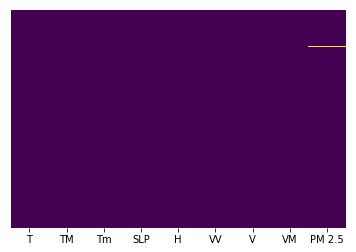

In [8]:
## Check for null values

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#Removing Null entry from dataset
data=data.dropna()


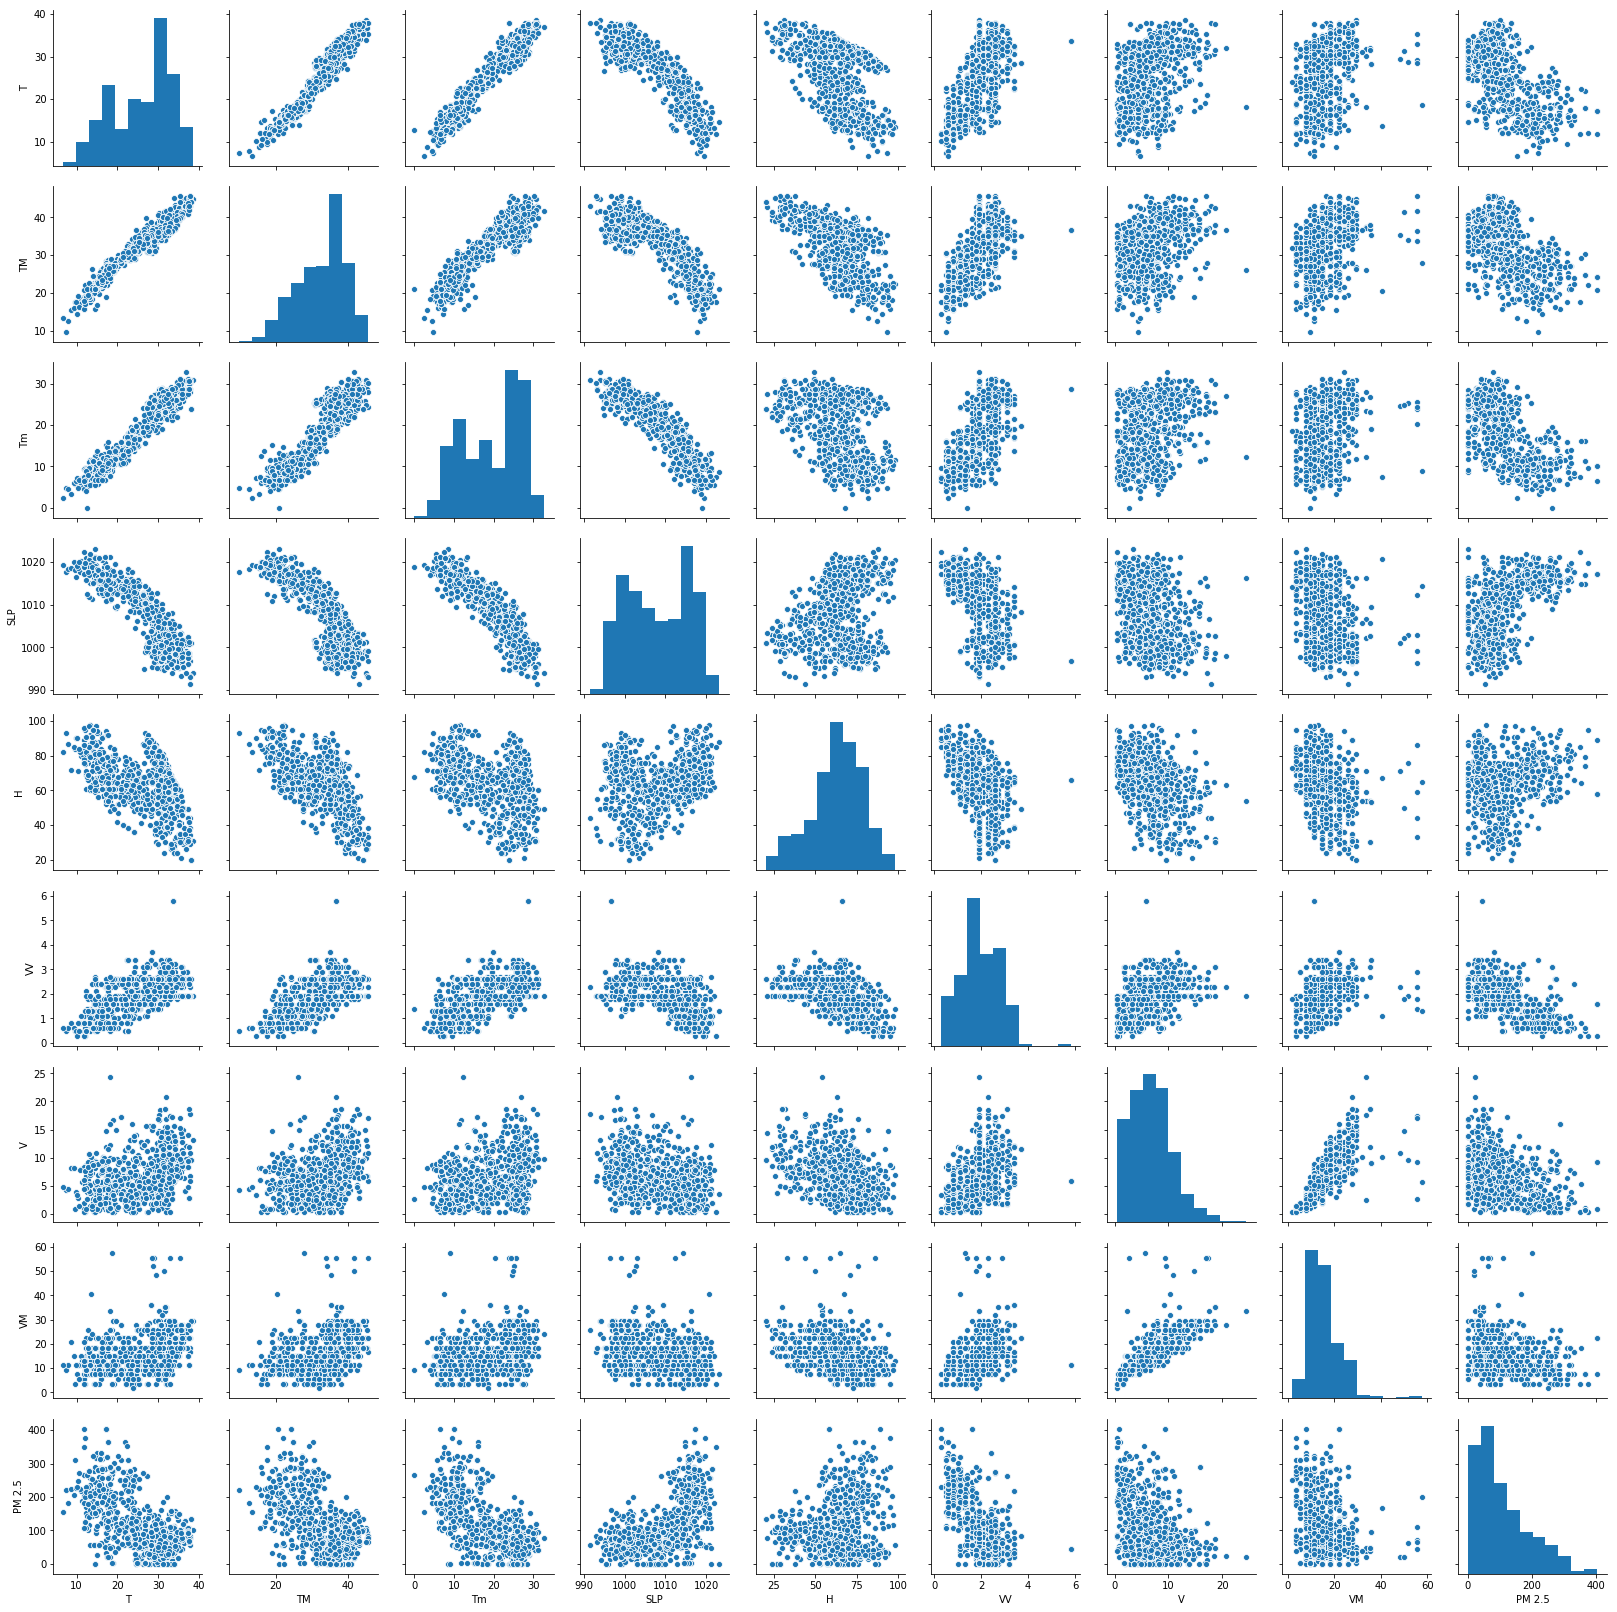

In [10]:
sns.pairplot(data,hue=)

## Numerical Variables

In [12]:
descrete_data=[feature for feature in data if len(data[feature].unique())<10]
descrete_data

[]

 - descrete data not present in dataset.

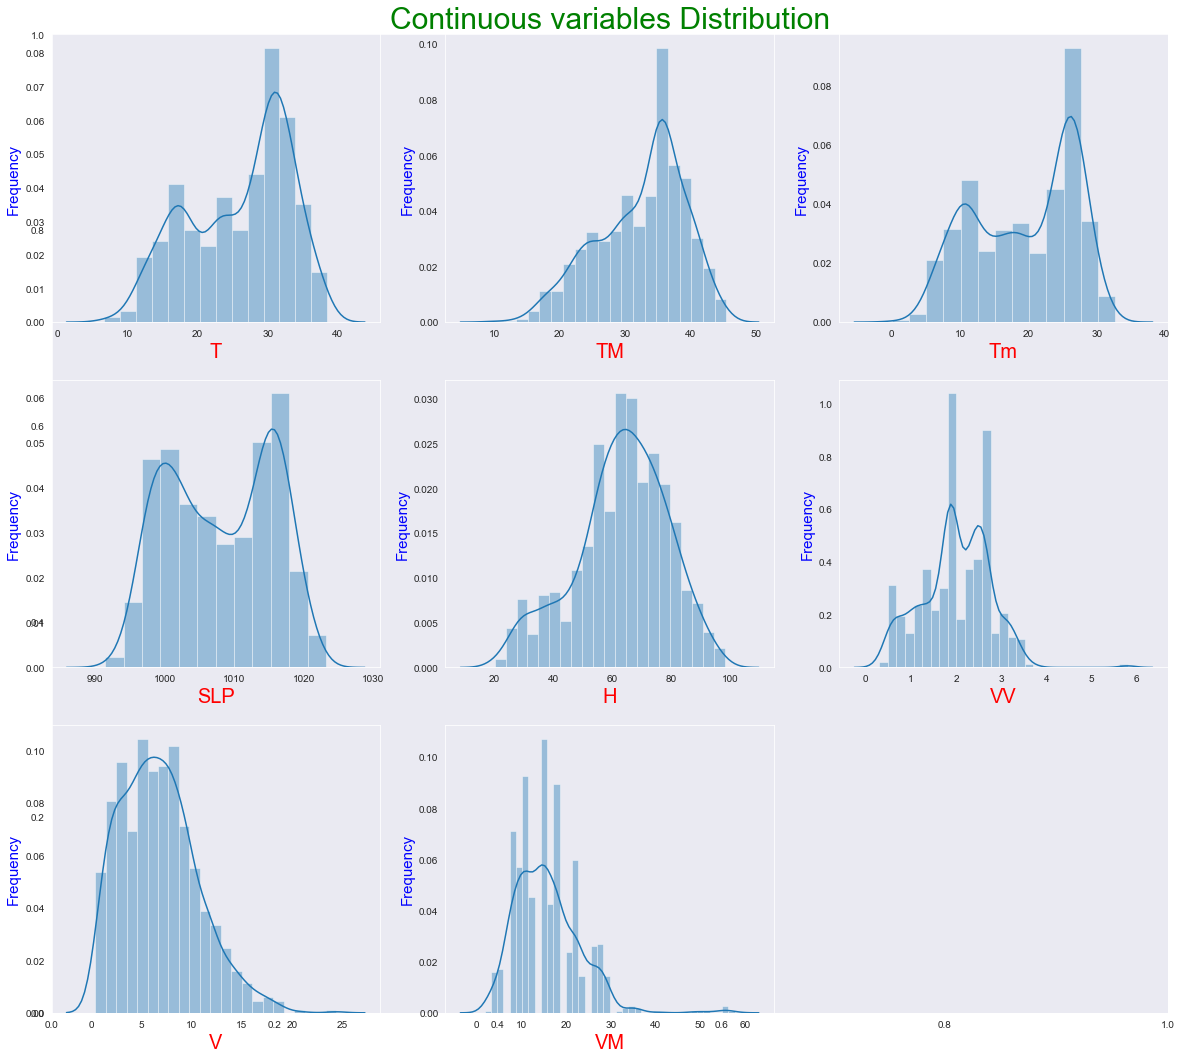

In [432]:
col=data.columns
fig=plt.figure(figsize=(20,18))
plt.title('Continuous variables Distribution',fontsize=30,color='green')
i=0
x=len(data.columns)
#print(x)
for i in range(x-1):
    #print(i)
    i=i
    #b=int(x+1)
    #print(b)
    z=(col[i])
    #print(z)
    sns.set_style("dark")
    fig.add_subplot(3,3,i+1)
    sns.distplot(data[z])
    plt.xlabel(z,fontsize=20,color='red')
    plt.ylabel('Frequency',fontsize=15,color='blue')
   

plt.show()
    

 - Need to standarized distribution.only one varible distributed normally.

## Outlier

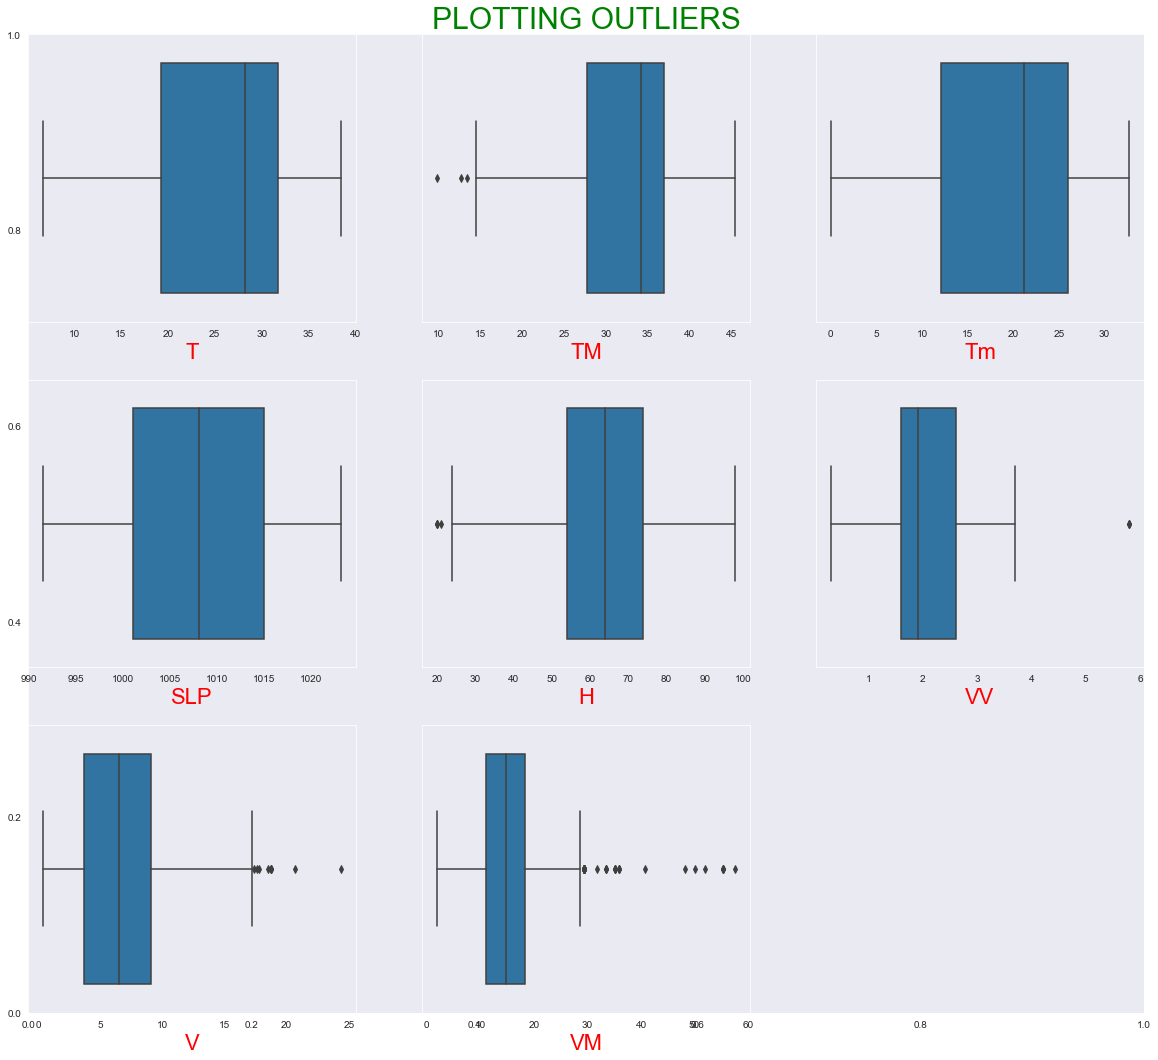

In [433]:
col=data.columns
fig=plt.figure(figsize=(20,18))
plt.title('PLOTTING OUTLIERS',fontsize=30,color='green')
i=0
x=len(data.columns)
for i in range(x-1):
    i=i
    z=(col[i])
    #print(z)
    sns.set_style("dark")
    fig.add_subplot(3,3,i+1)
    sns.boxplot(data[z])
    #plt.title(dataset[z])
    plt.xlabel(z,fontsize=22,color='red')
    #plt.ylabel()
    
        
plt.show()

In [434]:
Q1 = data.quantile(0.25)
Q3 =data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

T          12.400000
TM          9.200000
Tm         13.900000
SLP        13.900000
H          20.000000
VV          1.000000
V           5.400000
VM          7.200000
PM 2.5    116.458333
dtype: float64


In [435]:

(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,False,True,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [436]:

data=data[~((data< (Q1 - 1.5 * IQR)) |(data> (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(1032, 9)

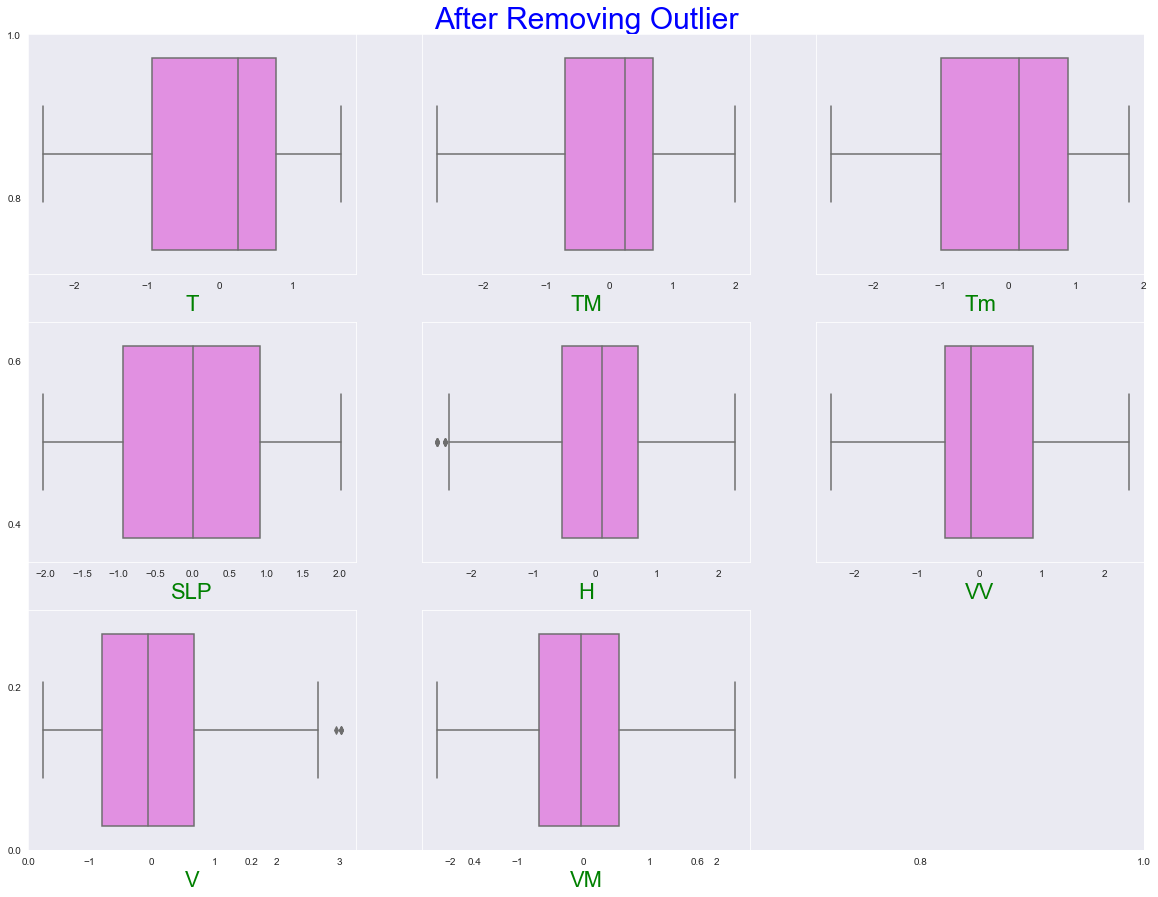

In [476]:
col=data.columns
fig=plt.figure(figsize=(20,15))

plt.title('After Removing Outlier',fontsize=30,color='blue')
i=0
x=len(data.columns)
for i in range(x-1):
    i=i
    z=(col[i])
    #print(z)
    sns.set_style("dark")
    fig.add_subplot(3,3,i+1)
    sns.boxplot(data[z],color='violet')
    #plt.title(dataset[z])
    plt.xlabel(z,color='green',fontsize=22)
    
        
plt.show()

## Target Variable:

-  PM 2.5
-  particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. 



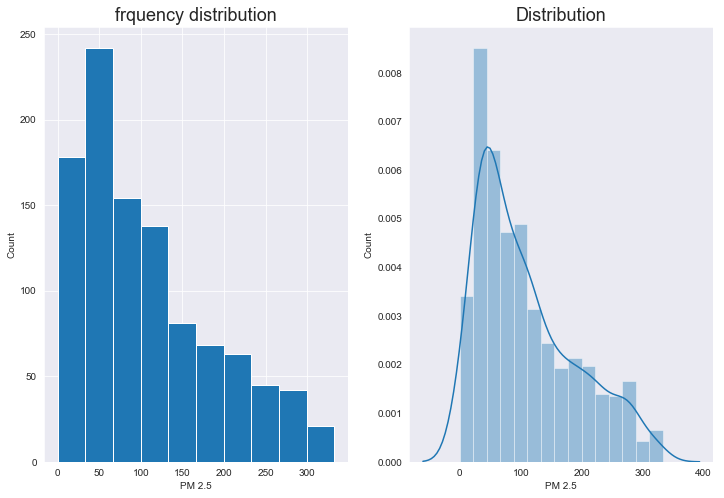

In [438]:
plt.figure(figsize=(12,8))
plt.subplot(121)

data['PM 2.5'].hist()
plt.xlabel('PM 2.5')
plt.ylabel('Count')
plt.title('frquency distribution',fontsize=18)
plt.subplot(122)
plt.xlabel('PM 2.5')
plt.ylabel('Count')
plt.title('Distribution',fontsize=18)
sns.distplot(data['PM 2.5'])
plt.show()

-  Target variable follows inverse exponential curv.

## Standard Scaler

In [439]:
data_scal=data
data1=data_scal.iloc[:,:-1]
data1.head()


,T,TM,Tm,SLP,H,VV,V,VM
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2
5,16.0,25.2,10.0,1013.2,79.0,0.6,4.8,11.1
6,13.4,21.0,9.2,1015.1,87.0,0.5,1.5,7.6
7,14.3,22.6,6.6,1016.3,76.0,0.8,0.4,3.5


In [440]:
from sklearn.preprocessing import StandardScaler

In [441]:
ss=StandardScaler()

In [442]:
ss.fit(data1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [443]:
data_scal=ss.transform(data1)
#data_scal=ss.transform(data_scal)

In [444]:
data1= pd.DataFrame(data_scal,index=data1.index,columns=data1.columns)
#scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [445]:
data1['PM 2.5']=data['PM 2.5']
data1
data=data1.copy()
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
3,-2.433573,-2.590425,-2.176174,1.412532,0.571560,-1.678179,0.448964,0.927450,223.208333
4,-1.900679,-1.763914,-2.027617,1.224401,-0.144277,-0.976160,0.619015,1.195709,200.645833
5,-1.395831,-1.105767,-1.271329,0.673446,1.027093,-1.958986,-0.486314,-0.665333,285.225000
6,-1.760443,-1.748608,-1.379370,0.928767,1.547701,-2.099390,-1.421592,-1.252148,236.825000
7,-1.634232,-1.503716,-1.730504,1.090022,0.831864,-1.678179,-1.733351,-1.939560,276.908333


In [446]:
X=data.iloc[:,:-1] ## independent features
y=data.iloc[:,-1] ## dependent features

In [447]:
#data.corr()

### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

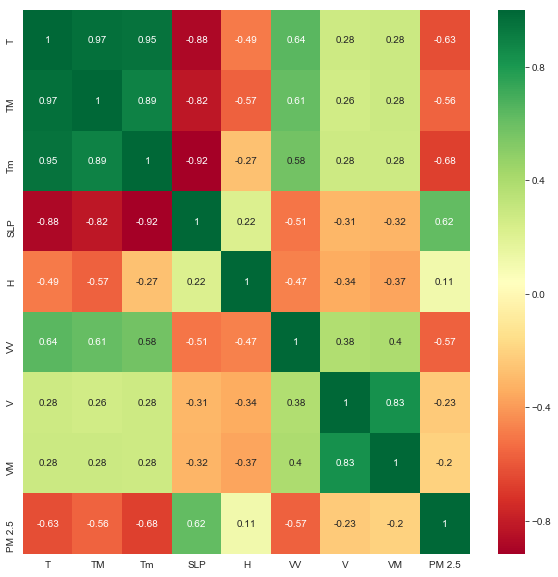

In [448]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [449]:
#visulation method for feature selction of model to Reduce multi Co-linearality  
#Heatmap shows co-realtion values between -1 to 1 for Each feature with respect to every feature.
#1-reresent 'Positive' relationship.
#-1-reresent 'Negative' relationship.
#0-reresent 'Undetermine' relationship.

#realtionship values grater than (Positive)(0.20)  or (Negative)(-.20) is consider as good features for model.


### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [450]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [451]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
3,-2.433573,-2.590425,-2.176174,1.412532,0.571560,-1.678179,0.448964,0.927450
4,-1.900679,-1.763914,-2.027617,1.224401,-0.144277,-0.976160,0.619015,1.195709
5,-1.395831,-1.105767,-1.271329,0.673446,1.027093,-1.958986,-0.486314,-0.665333
6,-1.760443,-1.748608,-1.379370,0.928767,1.547701,-2.099390,-1.421592,-1.252148
7,-1.634232,-1.503716,-1.730504,1.090022,0.831864,-1.678179,-1.733351,-1.939560


In [452]:
print(model.feature_importances_)

[0.14884527 0.14109326 0.2289841  0.11333895 0.09062634 0.19131035
 0.04175299 0.04404875]


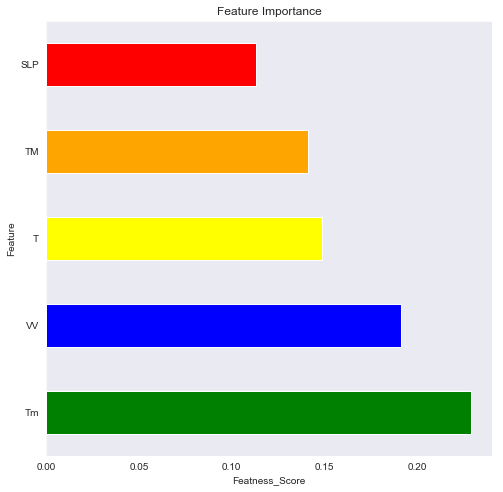

In [453]:
plt.figure(figsize=(8,8))
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
color=['green','blue','yellow','orange','red']
feat_importances.nlargest(5).plot(kind='barh',color=color)
plt.xlabel('Featness_Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

###Multi Linear Regression

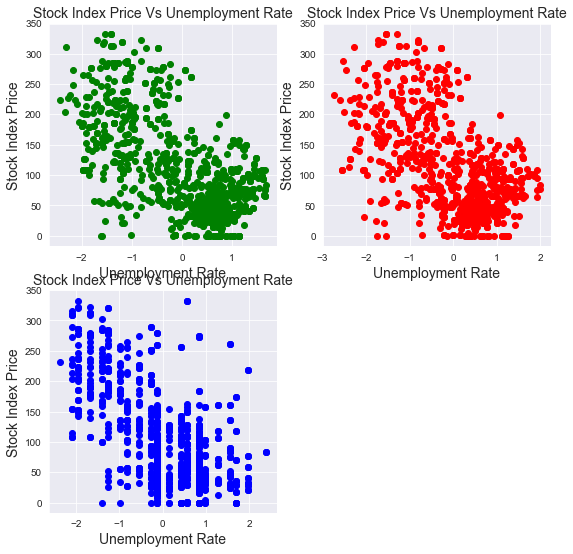

In [454]:

plt.figure(figsize=(9,9))
plt.subplot(2,2,1)   
plt.scatter(data['T'], data['PM 2.5'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)

plt.subplot(2,2,2)   
plt.scatter(data['TM'], data['PM 2.5'], color='Red')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.subplot(2,2,3)   
plt.scatter(data['VV'], data['PM 2.5'], color='blue')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)

plt.show()

In [455]:
#X1=data[['T','TM','VV']].values ## independent features
y1=data['PM 2.5'].values ## dependent features
#X = dataset['MinTemp'].values.reshape(-1,1)
#y = dataset['MaxTemp'].values.reshape(-1,1)
#x2=data.iloc[:,:2]
#y2=data.iloc[:-1]
x1=data.iloc[:,:-1].values


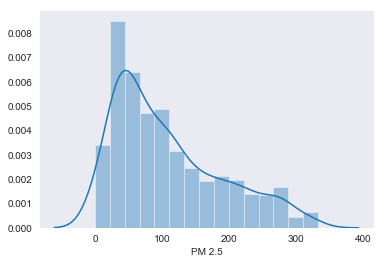

In [456]:
sns.distplot(y)

### Train Test split

In [457]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

In [458]:
from sklearn.linear_model import LinearRegression

In [459]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [460]:
regressor.coef_

array([ -3.44746765,   6.47774683, -42.43817818,   0.62630125,
       -13.61235283, -32.8013382 ,  -3.57244541,   6.08521287])

In [461]:
regressor.intercept_

108.09929735669404

In [462]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.5618469822864619


In [463]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.4903572274301723


In [464]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [465]:
score.mean()

0.47507920831725353

In [466]:
coeff_df = pd.DataFrame(regressor.coef_)  
coeff_df
print(list(data.columns))
print(coeff_df)

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5']
           0
0  -3.447468
1   6.477747
2 -42.438178
3   0.626301
4 -13.612353
5 -32.801338
6  -3.572445
7   6.085213


#### Model Evaluation

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an *decrease of 2.690 in AQI PM2.5 *.
- Holding all other features fixed, a 1 unit increase in TM is associated with an *increase of 0.46 in AQI PM 2.5 *.


In [467]:
prediction=regressor.predict(X_test)

In [468]:
df=pd.DataFrame({'Actual':y_test,'Predicted':prediction})
df.head()

,Actual,Predicted
0,24.875000,25.609518
1,40.833333,32.785910
2,24.875000,25.609518
3,112.291667,79.666922
4,8.416667,63.059343


(array([15., 34., 48., 40., 37., 25., 28., 35., 36., 12.]),
 array([ -3.35386617,  20.04556625,  43.44499868,  66.84443111,
         90.24386354, 113.64329597, 137.0427284 , 160.44216083,
        183.84159326, 207.24102569, 230.64045812]),
 <a list of 10 Patch objects>)

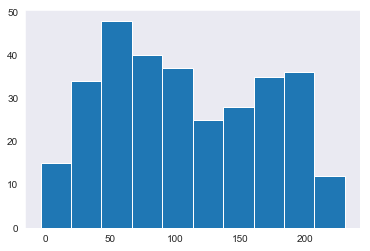

In [469]:
plt.hist(prediction)

<Figure size 432x288 with 0 Axes>

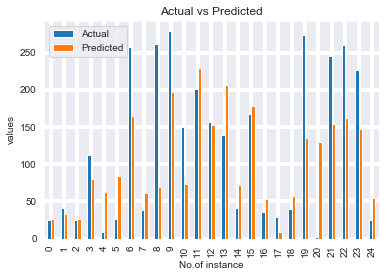

In [470]:
plt.figure()
df1 = df.head(25)
df1.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='4')
plt.grid(which='minor', linestyle=':', linewidth='4')
plt.title('Actual vs Predicted')
plt.xlabel('No.of instance')
plt.ylabel('values')
plt.show()

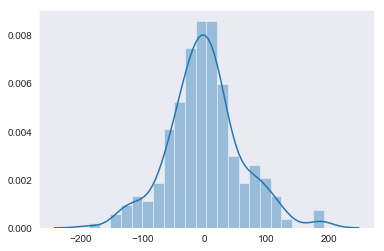

In [471]:
sns.distplot(y_test-prediction)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [472]:
from sklearn import metrics

In [473]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 43.65932739575892
MSE: 3453.5696296018587
RMSE: 58.767079471434165


In [474]:
regressor.score(X_test, y_test)

0.4903572274301723